In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

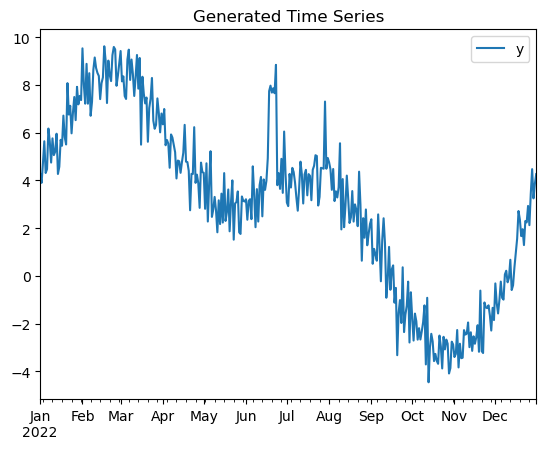

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a DataFrame with dates for the year 2022
range_of_dates = pd.date_range(start="2022-01-01", end="2022-12-31")
X = pd.DataFrame(index=range_of_dates)

# Create a sequence of day numbers and add day of the year information
X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.dayofyear

# Generate components of the target time series
signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

# Combine the components to get the target series
y = signal_1 + signal_2 + noise

# Add additional random noise to specific date range (June 18 - June 23)
peak_mask = (y.index.month == 6) & (y.index.day >= 18) & (y.index.day <= 23)
y.loc[peak_mask] = y.loc[peak_mask] + np.random.normal(5, 1, len(y.loc[peak_mask]))

# Convert the target series to a DataFrame and assign a column name
y = y.to_frame()
y.columns = ["y"]

# Plot the generated time series
y.plot(title="Generated Time Series");

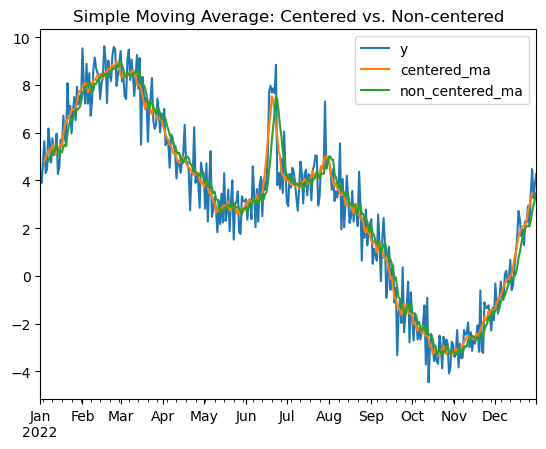

In [3]:
ma_df = y.copy()
WINDOW_SIZE = 7

ma_df["centered_ma"] = ma_df["y"].rolling(window=WINDOW_SIZE, center=True).mean()
ma_df["non_centered_ma"] = ma_df["y"].rolling(window=WINDOW_SIZE, center=False).mean()

ma_df.plot(title="Simple Moving Average: Centered vs. Non-centered");

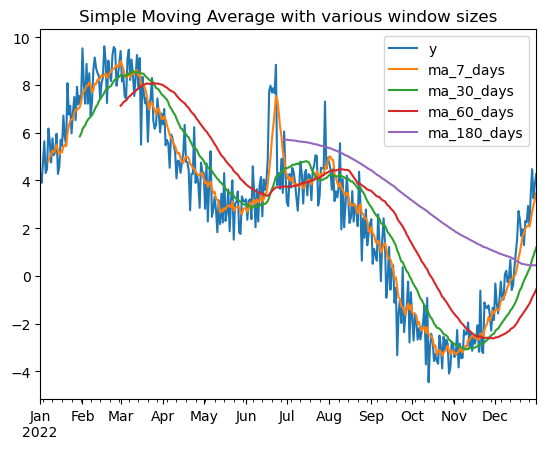

In [4]:
ma_df = y.copy()

for window in [7, 30, 60, 180]:
    ma_df[f"ma_{window}_days"] = ma_df["y"].rolling(window=window).mean()

ma_df.plot(title="Simple Moving Average with various window sizes");

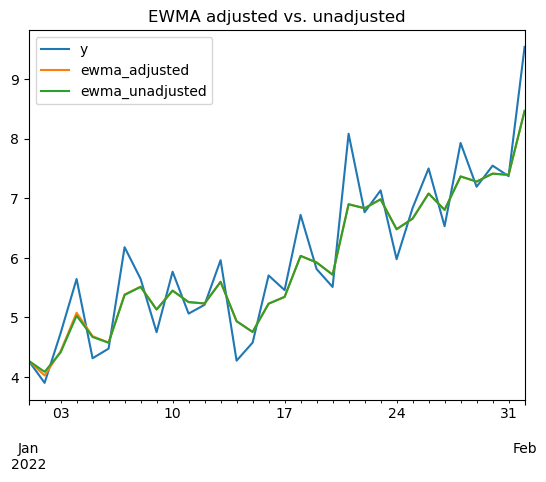

In [5]:
ewma_df = y.copy()

ewma_df["ewma_adjusted"] = ewma_df['y'].ewm(alpha=0.5, adjust=True).mean()
ewma_df["ewma_unadjusted"] = ewma_df['y'].ewm(alpha=0.5, adjust=False).mean()


ewma_df.loc["2022-01-01":"2022-02-01"].plot(title="EWMA adjusted vs. unadjusted");

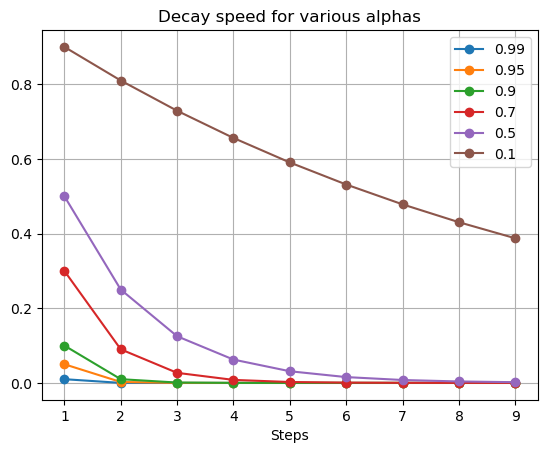

In [6]:
alpha_dict = {}
for alpha in [0.99, 0.95, 0.9, 0.7, 0.5, 0.1]:
    # this calculation assumes we are using the adjusted formula!
    alpha_dict[alpha] = [(1 - alpha) ** power for power in list(range(1, 10, 1))]

df = pd.DataFrame(alpha_dict)
df.index = range(1, len(df) + 1)

# Plot the DataFrame and set the x-label
ax = df.plot(title="Decay speed for various alphas", marker='o')
ax.set_xlabel("Steps", fontsize=10)
plt.grid(True);

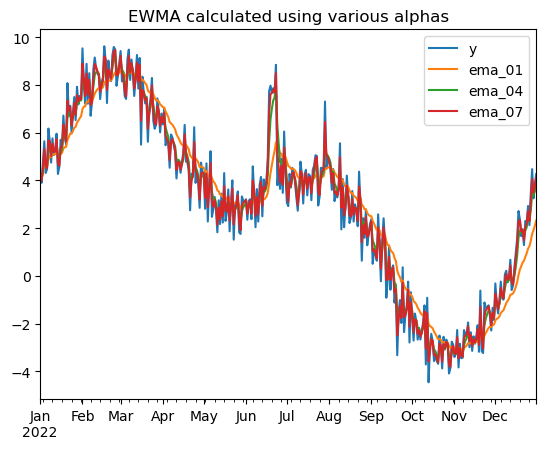

In [7]:
ewma_df = y.copy()
ALPHA_LIST = [0.1, 0.4, 0.7]

for alpha in ALPHA_LIST:
    ewma_df[f'ema_{str(alpha).replace(".", "")}'] = ewma_df['y'].ewm(alpha=alpha).mean()


ewma_df.plot(title="EWMA calculated using various alphas");

In [8]:
param_df = pd.DataFrame(data={"value": range(0, 50)}).set_index("value")

# half-life
param_df["half_life"] = 1 - np.exp(-np.log(2) / param_df.index)
param_df.loc[0, "half_life"] = np.nan

# span (accounting for missing value for 0)
param_df["span"] = 2/(1+param_df.index)
param_df.loc[0, "span"] = np.nan

# center of mass
param_df["com"] = 1/(1+param_df.index)

print(param_df.head(15))

       half_life      span       com
value                               
0            NaN       NaN  1.000000
1       0.500000  1.000000  0.500000
2       0.292893  0.666667  0.333333
3       0.206299  0.500000  0.250000
4       0.159104  0.400000  0.200000
5       0.129449  0.333333  0.166667
6       0.109101  0.285714  0.142857
7       0.094276  0.250000  0.125000
8       0.082996  0.222222  0.111111
9       0.074125  0.200000  0.100000
10      0.066967  0.181818  0.090909
11      0.061069  0.166667  0.083333
12      0.056126  0.153846  0.076923
13      0.051922  0.142857  0.071429
14      0.048305  0.133333  0.066667


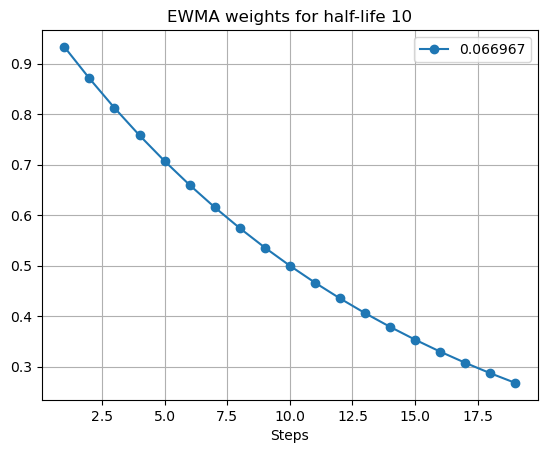

In [9]:
alpha_dict = {}

for alpha in [0.066967]:
    alpha_dict[alpha] = [(1 - alpha) ** power for power in list(range(1, 20, 1))]

df = pd.DataFrame(alpha_dict)
df.index = range(1, len(df) + 1)

# Plot the DataFrame and set the x-label
ax = df.plot(title="EWMA weights for half-life 10", marker='o')
ax.set_xlabel("Steps", fontsize=10)
plt.grid(True);